   STT   T1   L1   H1   S1   V1   X1   D1   N1   T2  ...  TBM1  TBM2  TBM3  \
0    1  7.2  7.3  6.3  7.3  7.0  7.9  7.3  5.5  8.4  ...  7.00  7.54  7.01   
1    2  5.4  3.9  3.9  4.0  5.4  5.4  5.3  2.8  6.3  ...  4.69  5.47  5.07   
2    3  5.6  6.8  7.2  7.5  4.3  7.4  5.8  3.2  5.0  ...  5.77  5.38  6.04   
3    4  6.6  6.4  5.3  6.9  5.4  7.3  6.4  5.8  5.1  ...  6.21  5.20  6.88   
4    5  6.0  5.0  6.0  7.3  6.5  7.7  7.9  6.1  5.4  ...  6.50  6.36  6.99   

   XL1  XL2  XL3  US_TBM1  US_TBM2  US_TBM3  KQXT  
0    K    K    K    2.800    3.016    2.804   0.0  
1    Y   TB   TB    1.876    2.188    2.028   0.0  
2   TB   TB   TB    2.308    2.152    2.416   1.0  
3   TB   TB    K    2.484    2.080    2.752   0.0  
4    K   TB    K    2.600    2.544    2.796   0.0  

[5 rows x 66 columns]

 The result of applying the function on the dataframe: 

374.0
       sum      mean median   min   max       std      Q1    Q2     Q3
       DH1       DH1    DH1   DH1   DH1       DH1     DH1   D

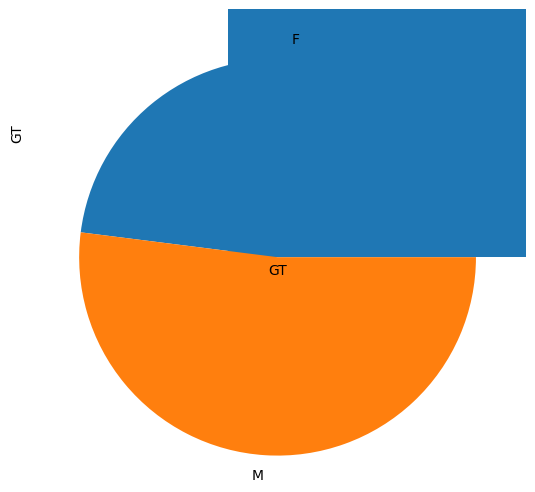

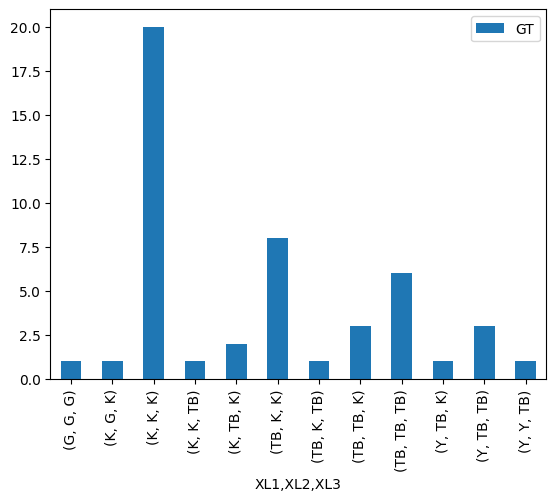

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dftuyensinh = pd.read_csv('processed_dulieuxettuyendaihoc.csv', delimiter=',')
print(dftuyensinh.head())

# 1. Hãy sắp xếp dữ liệu điểm DH1 theo thứ tự tăng dần
dftuyensinh.sort_values(by='DH1')

# 2. Hãy sắp xếp dữ liệu điểm DH2 tăng dần theo nhóm giới tính
dftuyensinh.sort_values(by=['GT','DH2'])

# 3
def get_mean(scores):
    return sum(scores)/len(scores)

result = dftuyensinh['DH1'].sum()
print('\n The result of applying the function on the dataframe: \n')
print(result)

def Q1(g):
    return np.percentile(g, 25)

def Q2(g):
    return np.percentile(g, 50)

def Q3(g):
    return np.percentile(g, 75)

def std(g):
    return np.std(g)

print(pd.pivot_table(data=dftuyensinh, index='KT', values='DH1', aggfunc=['sum','mean','median','min','max', std, Q1, Q2, Q3]))

# 4
print(pd.pivot_table(data=dftuyensinh, index=['KT', 'KV'], values='DH1', aggfunc=['sum','mean','median','min','max', std, Q1, Q2, Q3]))

# 5
print(pd.pivot_table(data=dftuyensinh, index=['KT', 'KV', 'DT'], values='DH1', aggfunc=['sum','mean','median','min','max', std, Q1, Q2, Q3]))

# Phan 2
# 1
gt = dftuyensinh.groupby('GT')['GT'].agg('count')
gt.plot.bar()

gt.plot.pie()

gt.plot.area()

# 2
var = pd.DataFrame(dftuyensinh,columns=['US_TBM1','US_TBm2','US_TBM3'])
var.describe()

# 3
DtVal = dftuyensinh[dftuyensinh['GT'] == 'M']
DtVal.groupby('DT')['DT'].agg('count')

# 4
KVVal = dftuyensinh[(dftuyensinh['GT'] == 'M') & (dftuyensinh['DT'] == 1)]
print(KVVal.groupby('KV')['KV'].agg('count'))

# 5
FVal = dftuyensinh[(dftuyensinh['DH1'] >= 5.0) & (dftuyensinh['DH2'] >= 5.0) & (dftuyensinh['DH3'] >= 5.0) & (dftuyensinh['KV'] == '2NT')]
print(FVal.groupby(['DH1','DH2','DH3'])['KV'].agg('count'))

#Phan 3
# 1
data = dftuyensinh[dftuyensinh['GT'] == 'F'].groupby(['XL1','XL2','XL3'])[['GT']].count()
data.unstack()
data.plot.bar()
plt.show()

# 2
khoiThiA = (dftuyensinh['KT'] == 'A')
khoiThiA1 = (dftuyensinh['KT'] == 'A1')
khoiThiB = (dftuyensinh['KT'] == 'B')

# data = dftuyensinh[(khoiThiA) & (khoiThiA1) & (khoiThiB) & (dftuyensinh['DT'] == 1) & (dftuyensinh['DT'] == 2)].groupby('KQXT')[['KV','KT']].count()
# data.unstack()
# data.plot.bar()